In [ ]:
#Erica Smith and I worked on the challenge together

#observations/inferences:

# 1. Based on the box and whisker plots for final tumor volume by Drug Regimen, Capomulin and Ramicane appear to have been the most successful at reducing tumor size, with Capomulin's median final tumor volume as 38.125164399999996 and Ramicane's median final tumor volume as 36.56165229.

# 2. Looking at the scatter plot and the linear regression equation of the Capomulin treatment scatterplot we can infer that heavier mice have tumors with higher volumes as compared to mice that weigh less grams.

# 3. When looking at the Capomulin, Ramicane, Infubinol, and Ceftamin treatments and the tumor volume's corresponding to the final timepoint per mouse, we notice that not all mice had the same number of timepoints recorded. Some mice only had one timepoint taken at the very beginning. Further background data would be helpful to know, was only one timepoint collected because the tumor killed those mice or was there another reason why each Mouse ID didn't have the same number of timepoint data available. This also skews our results, more timepoints mean that there was more time that the treatment was being supplied and more volume measurements were able to be taken. 


In [826]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#increase display width to view all columns at once
pd.options.display.width = 1200

#set paths for data
mouse_metadata_path = "/Users/bitty/matplotlib-challenge/matplotlib-challenge/Resources/Mouse_metadata.csv"
study_results_path = "/Users/bitty/matplotlib-challenge/matplotlib-challenge/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#look at data
print(mouse_metadata)
print(study_results)



    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

In [827]:
# Combine & Display the data table for preview
full_data_set = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
full_data_set.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [828]:
# Checking the number of mice.
full_data_set.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [829]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = full_data_set.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [830]:
cleaned_data_set = full_data_set.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_data_set.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [831]:
#get a clean duplicate count
cleaned_data_set.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [832]:
print(cleaned_data_set["Drug Regimen"].unique())

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [833]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_by_drug_regimen = cleaned_data_set.groupby("Drug Regimen")
print(grouped_by_drug_regimen.head())


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0       k403     Ramicane    Male          21          16          0           45.000000                 0
1       k403     Ramicane    Male          21          16          5           38.825898                 0
2       k403     Ramicane    Male          21          16         10           35.014271                 1
3       k403     Ramicane    Male          21          16         15           34.223992                 1
4       k403     Ramicane    Male          21          16         20           32.997729                 1
10      s185    Capomulin  Female           3          17          0           45.000000                 0
11      s185    Capomulin  Female           3          17          5           43.878496                 0
12      s185    Capomulin  Female           3          17         10           37.614948                 0
13      s185    Capomulin  Female    

In [834]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
av_tumor_size_by_reg = pd.DataFrame(cleaned_data_set.groupby(["Drug Regimen"]).mean().round(2))
av_tumor_size_by_reg = av_tumor_size_by_reg.drop(columns=["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
print(av_tumor_size_by_reg)

#median
median_tumor_vol = pd.DataFrame(cleaned_data_set.groupby(["Drug Regimen"]).median().round(2))
median_tumor_vol = median_tumor_vol.drop(columns=["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
print(median_tumor_vol)

#standard dev
std_tumor_vol = pd.DataFrame(cleaned_data_set.groupby(["Drug Regimen"]).std().round(2))
std_tumor_vol = std_tumor_vol.drop(columns=["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
print(std_tumor_vol)

#SEM
sem_tumor_vol = pd.DataFrame(cleaned_data_set.groupby(["Drug Regimen"]).sem().round(2))
sem_tumor_vol = sem_tumor_vol.drop(columns=["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
print(sem_tumor_vol)

              Tumor Volume (mm3)
Drug Regimen                    
Capomulin                  40.68
Ceftamin                   52.59
Infubinol                  52.88
Ketapril                   55.24
Naftisol                   54.33
Placebo                    54.03
Propriva                   52.39
Ramicane                   40.22
Stelasyn                   54.23
Zoniferol                  53.24
              Tumor Volume (mm3)
Drug Regimen                    
Capomulin                  41.56
Ceftamin                   51.78
Infubinol                  51.82
Ketapril                   53.70
Naftisol                   52.51
Placebo                    52.29
Propriva                   50.91
Ramicane                   40.67
Stelasyn                   52.43
Zoniferol                  51.82
              Tumor Volume (mm3)
Drug Regimen                    
Capomulin                   4.99
Ceftamin                    6.27
Infubinol                   6.57
Ketapril                    8.28
Naftisol  

In [835]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#merge data
tumor_size_by_drug_summary = pd.merge(av_tumor_size_by_reg, median_tumor_vol, on="Drug Regimen")
tumor_size_by_drug_summary = tumor_size_by_drug_summary.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volume (mm3)", "Tumor Volume (mm3)_y":"Median Tumor Volume (mm3)"})

tumor_size_by_drug_summary = pd.merge(tumor_size_by_drug_summary, std_tumor_vol, on="Drug Regimen")
tumor_size_by_drug_summary = tumor_size_by_drug_summary.rename(columns={"Tumor Volume (mm3)":"Standard Deviation of Tumor Volume (mm3)"})

tumor_size_by_drug_summary = pd.merge(tumor_size_by_drug_summary, sem_tumor_vol, on="Drug Regimen")
tumor_size_by_drug_summary = tumor_size_by_drug_summary.rename(columns={"Tumor Volume (mm3)":"SEM of Tumor Volume (mm3)"})
print(tumor_size_by_drug_summary)

              Mean Tumor Volume (mm3)  Median Tumor Volume (mm3)  Standard Deviation of Tumor Volume (mm3)  SEM of Tumor Volume (mm3)
Drug Regimen                                                                                                                         
Capomulin                       40.68                      41.56                                      4.99                       0.33
Ceftamin                        52.59                      51.78                                      6.27                       0.47
Infubinol                       52.88                      51.82                                      6.57                       0.49
Ketapril                        55.24                      53.70                                      8.28                       0.60
Naftisol                        54.33                      52.51                                      8.13                       0.60
Placebo                         54.03                      52.

## Bar and Pie Charts

In [837]:
#create dataframe 
drug_regimen_df = pd.DataFrame(cleaned_data_set["Drug Regimen"].value_counts())
drug_regimen_df

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,156


Text(0, 0.5, 'Mouse Measurement Count')

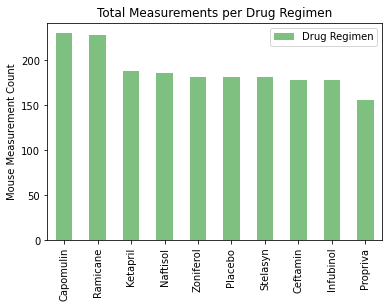

In [838]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_df.plot.bar(rot=90, color='green', align='center', alpha=0.5)
plt.title("Total Measurements per Drug Regimen")
plt.ylabel("Mouse Measurement Count")

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64


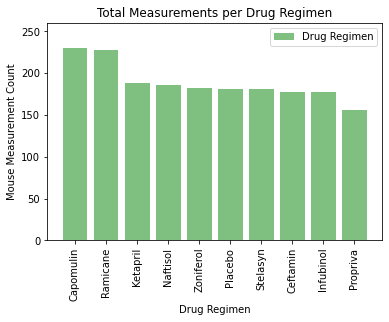

In [857]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_names = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva']
legend_name = "Drug Regimen"
#set y values
y_values = cleaned_data_set["Drug Regimen"].value_counts()
print(y_values)

plt.bar(drug_names, y_values, color='green', align='center', alpha=0.5)
labels = drug_names
plt.xticks(drug_names, labels, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylim(0, max(y_values)+30)
plt.ylabel('Mouse Measurement Count')
plt.title('Total Measurements per Drug Regimen')

#note: with plt.legend, the full name only printed when in brackets 
plt.legend(['Drug Regimen'])
plt.show()

<AxesSubplot:title={'center':'Mouse Gender Proportion'}, ylabel='Sex'>

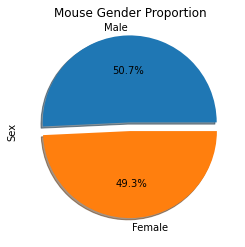

In [840]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mice = cleaned_data_set["Sex"].value_counts()
explode = (0.1, 0)
gender_mice.plot.pie(title="Mouse Gender Proportion" ,explode=explode, autopct="%1.1f%%", shadow=True)

Male      958
Female    930
Name: Sex, dtype: int64


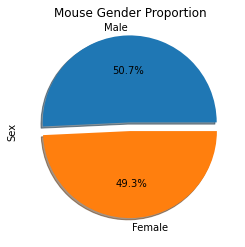

In [841]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_mice = cleaned_data_set["Sex"].value_counts()
print(gender_mice)
explode = (0.1, 0)
plt.title('Mouse Gender Proportion')
plt.ylabel('Sex')
labels = ("Male", "Female")
plt.pie(gender_mice, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True)
plt.show()



## Quartiles, Outliers and Boxplots

In [859]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_4_plan = cleaned_data_set.loc[(cleaned_data_set["Drug Regimen"] == "Capomulin") | (cleaned_data_set["Drug Regimen"] == "Ramicane") | (cleaned_data_set["Drug Regimen"] == "Infubinol") | (cleaned_data_set["Drug Regimen"] == "Ceftamin"), ["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]

# Start by getting the last (greatest) timepoint for each mouse & get the tumor volume at the last timepoint
final_tumor_4_plan = final_tumor_4_plan.groupby(["Drug Regimen", "Mouse ID"]).apply(lambda final_tumor_4_plan: final_tumor_4_plan.loc[final_tumor_4_plan.Timepoint.idxmax()])
final_tumor_4_plan.head()

Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
Drug Regimen Mouse ID                                                     
Capomulin    b128         b128         45           38.982878    Capomulin
             b742         b742         45           38.939633    Capomulin
             f966         f966         20           30.485985    Capomulin
             g288         g288         45           37.074024    Capomulin
             g316         g316         45           40.159220    Capomulin

In [843]:
#sanity check the number of timepoints
cleaned_data_set["Mouse ID"].value_counts()

o926    10
q633    10
n364    10
p136    10
f545    10
        ..
b447     1
l872     1
u153     1
o848     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [844]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
drug_reg_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

for drugs in drug_reg_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = final_tumor_4_plan.loc[final_tumor_4_plan["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]

    # add subset 
    tumor_vol_data.append(final_tumor_volume)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = final_tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f'Drug Regimen:{drugs}')
    print(f'The lower quartile of tumor volumes is: {lowerq}')
    print(f'The upper quartile of tumor volumes is: {upperq}')
    print(f' The Interquartile Range of tumor volumes is: {iqr}')
    print(f' The median of tumor volumes is: {quartiles[0.5]}')  
   
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f' Values below {lower_bound} and above {upper_bound} could be outliers')
    print('')

#sanity check: print the data
#print(tumor_vol_data)

Drug Regimen:Capomulin
The lower quartile of tumor volumes is: 32.37735684
The upper quartile of tumor volumes is: 40.1592203
 The Interquartile Range of tumor volumes is: 7.781863460000004
 The median of tumor volumes is: 38.125164399999996
 Values below 20.70456164999999 and above 51.83201549 could be outliers

Drug Regimen:Ramicane
The lower quartile of tumor volumes is: 31.56046955
The upper quartile of tumor volumes is: 40.65900627
 The Interquartile Range of tumor volumes is: 9.098536719999998
 The median of tumor volumes is: 36.56165229
 Values below 17.912664470000003 and above 54.30681135 could be outliers

Drug Regimen:Infubinol
The lower quartile of tumor volumes is: 54.04860769
The upper quartile of tumor volumes is: 65.52574285
 The Interquartile Range of tumor volumes is: 11.477135160000003
 The median of tumor volumes is: 60.16518046
 Values below 36.83290494999999 and above 82.74144559000001 could be outliers

Drug Regimen:Ceftamin
The lower quartile of tumor volumes is

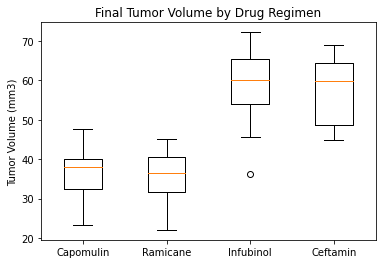

In [845]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug_reg_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#quartiles = final_tumor_4_plan["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75]).unstack()
quartiles = final_tumor_volume.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

plt.boxplot(tumor_vol_data, labels=drug_reg_list)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Final Tumor Volume by Drug Regimen")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

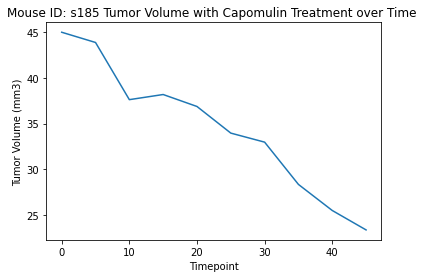

In [846]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_only = cleaned_data_set.loc[(cleaned_data_set["Drug Regimen"] == "Capomulin"), ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
mouse_s185_id = capomulin_only.head(10)
mouse_s185_id = pd.DataFrame(mouse_s185_id)
mouse_s185_id

plt.plot(mouse_s185_id['Timepoint'], mouse_s185_id['Tumor Volume (mm3)'])
plt.title('Mouse ID: s185 Tumor Volume with Capomulin Treatment over Time ')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

     Mouse ID  Weight (g)  Tumor Volume (mm3)
10       s185          17           45.000000
11       s185          17           43.878496
12       s185          17           37.614948
13       s185          17           38.177232
14       s185          17           36.866876
...       ...         ...                 ...
440      i557          24           47.685963
1452     r157          25           45.000000
1453     r157          25           45.597064
1454     r157          25           46.059608
1455     r157          25           46.539206

[230 rows x 3 columns]


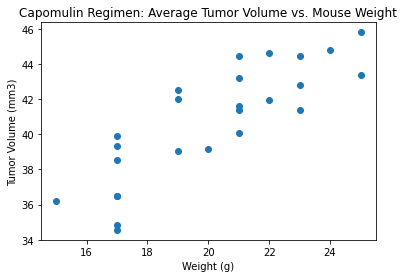

In [861]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_only_scatter = cleaned_data_set.loc[(cleaned_data_set["Drug Regimen"] == "Capomulin"), ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
print(capomulin_only_scatter)

capomulin_only_scatter = capomulin_only_scatter.groupby('Mouse ID').mean()

plt.scatter(capomulin_only_scatter["Weight (g)"], capomulin_only_scatter["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Regimen: Average Tumor Volume vs. Mouse Weight')
plt.show()

## Correlation and Regression

In [860]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_only_scatter["Weight (g)"], capomulin_only_scatter["Tumor Volume (mm3)"])
correlation = round(correlation[0],2)
print(f' The correlation coefficient for Average Tumor Volume and Average Weight is {correlation}')

#line regress
x_values = capomulin_only_scatter["Weight (g)"]
y_values = capomulin_only_scatter["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f' The equation for the linear regression of Average Tumor Volume v. Average Weight is: {line_eq}')

 The correlation coefficient for Average Tumor Volume and Average Weight is 0.84
 The equation for the linear regression of Average Tumor Volume v. Average Weight is: y= 0.95x + 21.55


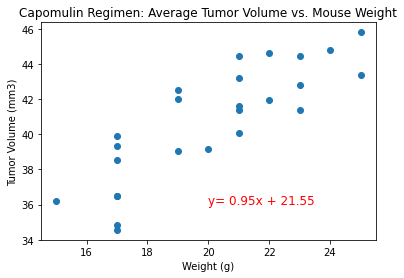

In [862]:

capomulin_only_scatter = capomulin_only_scatter.groupby('Mouse ID').mean()

plt.scatter(capomulin_only_scatter["Weight (g)"], capomulin_only_scatter["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Regimen: Average Tumor Volume vs. Mouse Weight')
plt.annotate(line_eq, (20,36), fontsize=12, color='red')
plt.show()